In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(1000, n_features=2, centers=5, random_state=3)

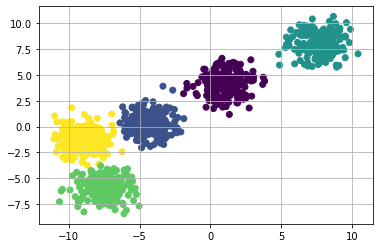

In [168]:
plt.grid(True)
plt.scatter(X[:, 0], X[:, 1], c = Y);

In [169]:
K = 5
color = ['red', 'green',  'blue', 'ornge', 'yellow']

clusters = {}
# generate random centers for each clusters
for i in range(K):
    center = 10*(2*np.random.random((X.shape[1], )) - 1)
    points = []
    cluster = {
        'center' : center,
        'points' : points,
        'color' : color[i]
    }
    clusters[i] = cluster
    

In [170]:
def distance(v1, v2):
    return np.sum((v2 - v1)**2)**0.5

def update_clusters(clusters, K): # E -- step
    # update the center of each cluster with zero new points 
    for k in range(K):
        pts = np.array(clusters[k]['points'])
        if pts.shape[0] > 0: # if cluster has some points
            new_center = np.mean(pts,  axis = 0)
            clusters[k]['center'] = new_center
            clusters[k]['points'] = []
    
        return clusters

def plot_clustors(clusters, K): 
    
    for k in range(K):
        
        pts = np.array(clusters[k]['points'])
        
        # plot the cluster points
        try:
            plt.scatter(pts[:, 0], pts[:, 1], color= clusters[k]['color'])
        except:
            pass
        # plot the cluster center
        plt.scatter(clusters[k]['center'][0], clusters[k]['center'][1], color = 'black', marker='*')
        
    
    
def k_means(X, clusters, K): # M -- step 
    m = X.shape[0]
    for i in range(m):
        dist = []
        
        for k in range(K):
            dist.append(distance(clusters[k]['center'], X[i]))
          
        nearest_cluster = np.argmin(dist)
        clusters[nearest_cluster]['points'].append(X[i])
    
    plot_clustors(clusters, K)
    clusters = update_clusters(clusters, K)

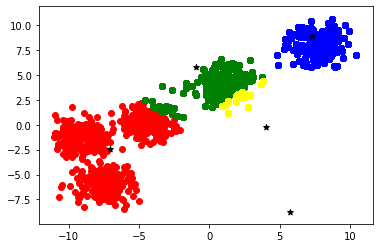

In [177]:
k_means(X, clusters, K)

### K means using sklearn

In [18]:
from sklearn.cluster import KMeans

In [19]:
X

array([[-1.0748078 , -4.11861893],
       [-3.56136733, -4.98737795],
       [-6.1256452 ,  1.82963918],
       ...,
       [-1.46335853, -8.46162063],
       [-3.57926549, -3.91831388],
       [-1.23620814, -4.64636828]])

In [20]:
km = KMeans(n_clusters=5)

In [21]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
centers = km.cluster_centers_

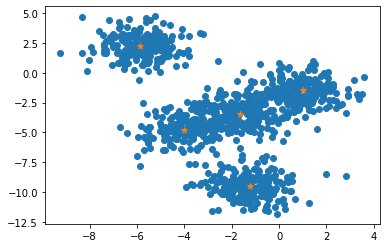

In [33]:
plt.scatter(X[:, 0],X[:, 1])
plt.scatter(centers[:, 0], centers[:, 1],marker="*");

### K means can still fail

In [43]:
from sklearn.datasets import make_circles, make_moons

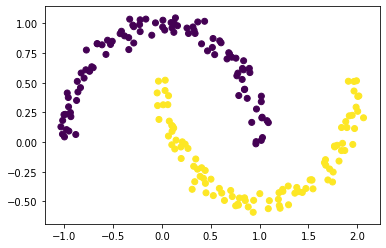

In [57]:
moon_x, moon_y = make_moons(n_samples=200, noise=0.05)
plt.scatter(moon_x[:, 0], moon_x[:, 1], c=moon_y);

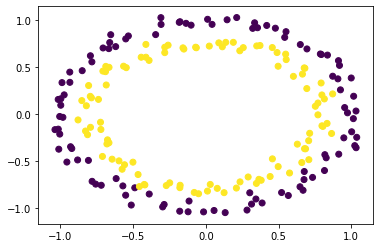

In [60]:
circle_x, circle_y = make_circles(n_samples=200, noise=0.05)
plt.scatter(circle_x[:, 0], circle_x[:, 1], c=circle_y);

### testing of the performance of the kmeans algorithm on  non-seperable data

In [77]:
kmm = KMeans(n_clusters=2)
kmm.fit(moon_x, moon_y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [78]:
moon_center = kmm.cluster_centers_

### visualization

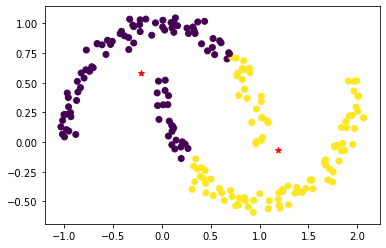

In [87]:
plt.scatter(moon_x[:, 0], moon_x[:, 1], c=kmm.labels_)
plt.scatter(moon_center[:, 0], moon_center[:, 1], marker='*', c='red');

### lets do the same for circle dataset

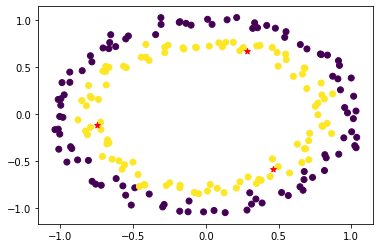

In [92]:
kmc = KMeans(n_clusters=3)
kmc.fit(circle_x, circle_y)
circle_center = kmc.cluster_centers_
plt.scatter(circle_x[:, 0], circle_x[:, 1], c=circle_y)
plt.scatter(circle_center[:, 0], circle_center[:, 1], marker='*', c='red');

### DBSCAN (Density Based Scan algorithm)

In [105]:
from sklearn.cluster import DBSCAN

In [130]:
dbscan = DBSCAN(eps=0.1, min_samples=2)
dbscan.fit(circle_x, circle_y)
ypredict = dbscan.fit_predict(circle_x)

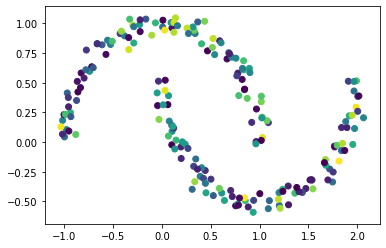

In [131]:
plt.scatter(moon_x[:, 0], moon_x[:, 1], c=dbscan.labels_);
# plt.scatter(ypredict[:, 0], ypredict[:, 1], marker='*', c='red');